In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
atp = pd.read_csv('atp_data.csv')
confidence = pd.read_csv('confidence_data.csv')
atp.head()


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [35]:
atp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

In [41]:
atp_cat = atp.drop(['PSW', 'PSL', 'B365W', 'B365L', 'elo_winner', 'elo_loser', 'proba_elo', 'Date'], axis = 1)
atp_cat = atp_cat.astype(object)
atp_cat.describe(include = 'object')

,ATP,Location,Tournament,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment
count,44708,44708,44708,44708,44708,44708,44708,44708,44708,44708,44708,44708,44521.0,44521.0,44708
unique,69,115,207,8,2,4,8,2,899,1400,587,920,4.0,3.0,4
top,6,Paris,Australian Open,International,Outdoor,Hard,1st Round,3,Federer R.,Lopez F.,1,46,2.0,0.0,Completed
freq,2159,2784,2159,10792,36532,23799,20728,36379,970,369,1007,393,35235.0,27976.0,43015


In [37]:
atp.describe(include = 'object')


TypeError: data type 'ATP' not understood

In [67]:
# Distributions des variables de type 'object'
# Location
print(atp['Location'].value_counts())


Paris         2784
London        2183
Melbourne     2159
New York      2059
Miami         1520
              ... 
Dusseldorf      27
Budapest        27
Antalya         27
Pune            27
Lisbon          15
Name: Location, Length: 115, dtype: int64


In [68]:
# Tournament
print(atp['Tournament'].value_counts())


Australian Open           2159
US Open                   2032
French Open               2032
Wimbledon                 2032
Sony Ericsson Open         950
                          ... 
LA Tennis Open              27
Gazprom Hungarian Open      27
Power Horse Cup             27
Portugal Open               27
New York Open               27
Name: Tournament, Length: 207, dtype: int64


In [51]:
# Date
print(atp['Date'].value_counts())


2000-01-17    127
2000-06-26    127
2000-08-28    127
2002-06-24    127
2002-05-27    127
             ... 
2015-09-11      1
2015-09-12      1
2015-09-13      1
2011-04-03      1
2013-11-11      1
Name: Date, Length: 4104, dtype: int64


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,elo_winner,elo_loser,proba_elo,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,1500.0,1500.0,0.5,0,0,1,0,0,0,0
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,1500.0,1500.0,0.5,0,0,1,0,0,0,0
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,1500.0,1500.0,0.5,0,0,1,0,0,0,0
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,1500.0,1500.0,0.5,0,0,1,0,0,0,0
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,1500.0,1500.0,0.5,0,0,1,0,0,0,0


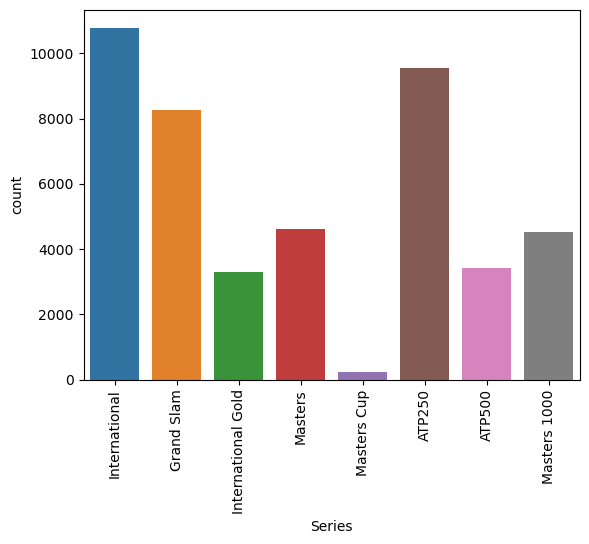

In [11]:
# Series
sns.countplot(atp['Series'])
plt.xticks(rotation = 90);
# Dichotomisation de la variable des noms des catégories de tournois (dans une nouvelle colonne du DataFrame)
atp = atp.join(pd.get_dummies(atp.Series, prefix= 'Series', drop_first = True))


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


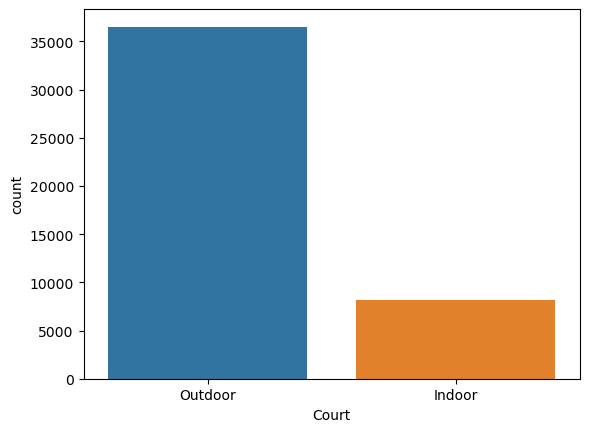

In [14]:
# Court 
sns.countplot(atp['Court']);
# Dichotomisation de la variable des noms des court de tennis en nombres (dans une nouvelle colonne du DataFrame)
atp = atp.join(pd.get_dummies(atp.Series, prefix= 'Court', drop_first = True))


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


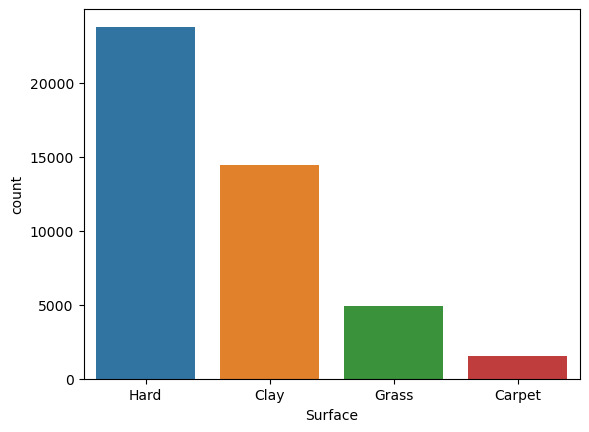

In [16]:
# Surface
sns.countplot(atp['Surface']);
# Dichotomisationde la variable des noms du type de sol en nombres (dans une nouvelle colonne du DataFrame)
atp = atp.join(pd.get_dummies(atp.Series, prefix= 'Surface', drop_first = True))


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


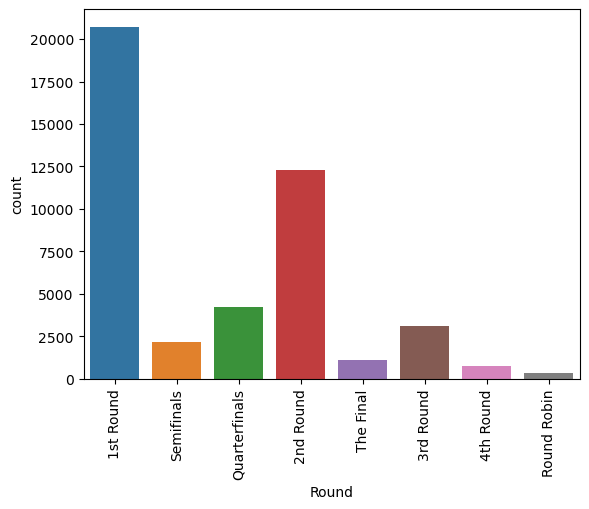

In [18]:
# Round
sns.countplot(atp['Round'])
plt.xticks(rotation = 90);
# Dichotomisation de la variable des phases/étapes de tournois
atp = atp.join(pd.get_dummies(atp.Series, prefix= 'Round', drop_first = True))


In [52]:
# Winner
print(atp['Winner'].value_counts())


Federer R.        970
Nadal R.          803
Djokovic N.       687
Ferrer D.         632
Murray A.         560
                 ... 
Cruciat A.          1
De Heart R.         1
Jun W.S.            1
Qureshi A.U.H.      1
Clezar G.           1
Name: Winner, Length: 899, dtype: int64


In [53]:
# Loser
print(atp['Loser'].value_counts())


Lopez F.           369
Youzhny M.         345
Verdasco F.        339
Ferrer D.          325
Nieminen J.        308
                  ... 
Lejnieks K.          1
Ebelthite C.         1
Anderson A.          1
Hutchins R.          1
Seyboth Wild T.      1
Name: Loser, Length: 1400, dtype: int64


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


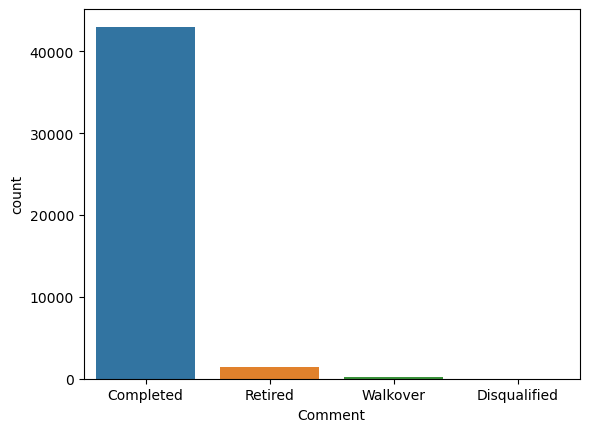

In [56]:
#Comment 
sns.countplot(atp['Comment']);


6     2159
20    1456
19    1424
31    1340
51    1324
      ... 
65     464
66     342
67     106
68      31
69      15
Name: ATP, Length: 69, dtype: int64


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


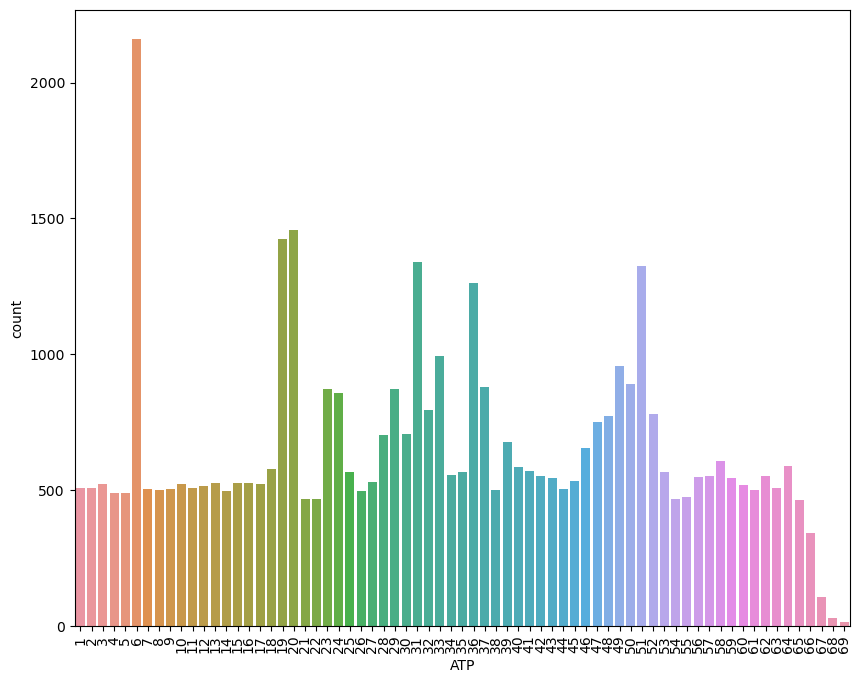

In [88]:
# Distribution des variables catégorielles
# ATP
print(atp['ATP'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(atp['ATP']);
plt.xticks(rotation = 90);


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


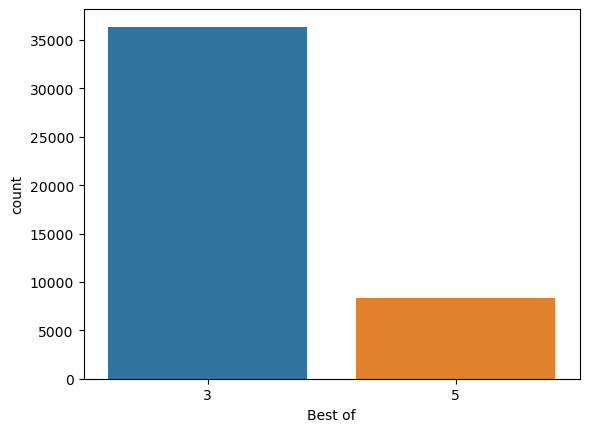

In [89]:
#Best of, variable categorielle 
sns.countplot(atp['Best of']);


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


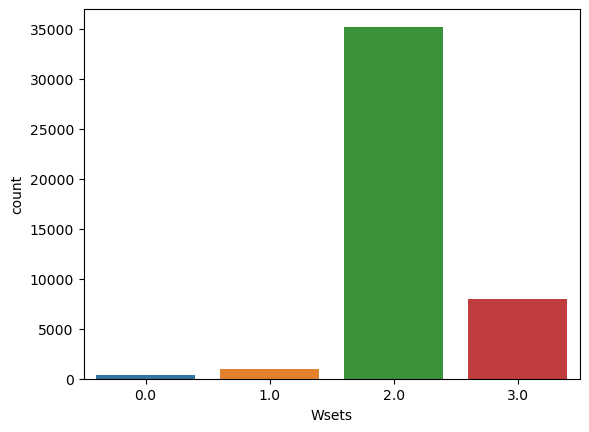

In [98]:
#Wsets
sns.countplot(atp['Wsets']);


C:\Users\Invite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


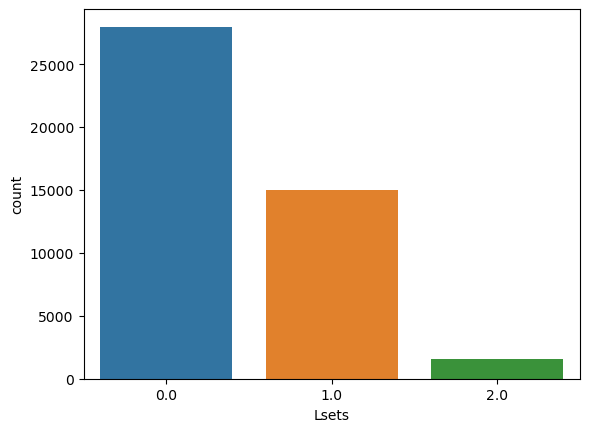

In [99]:
#Lsets
sns.countplot(atp['Lsets']);


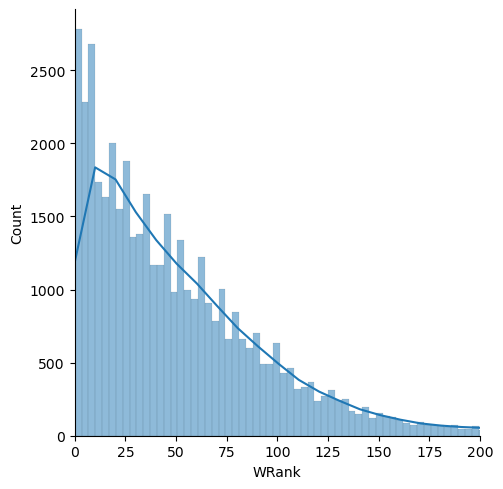

In [95]:
# Distribution des variables numeriques
# WRank
sns.displot(atp['WRank'], kde=True)
plt.xlim(0,200);

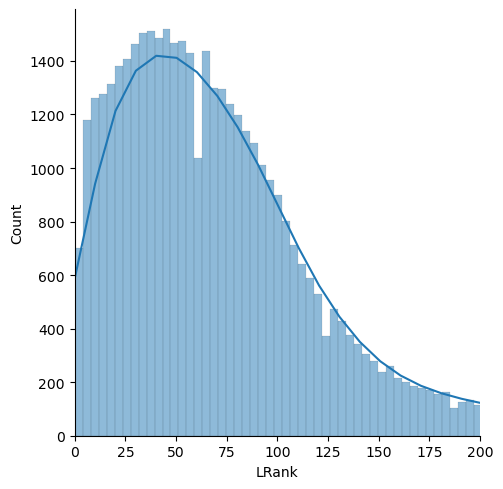

In [96]:
#LRank
sns.displot(atp['LRank'], kde=True)
plt.xlim(0,200);

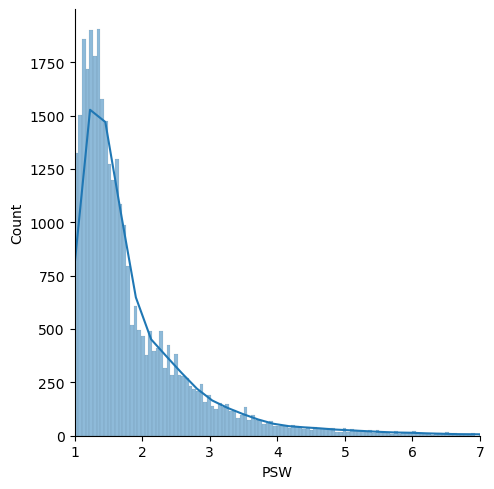

In [103]:
#PSW 
sns.displot(atp['PSW'], kde=True)
plt.xlim(1,7);


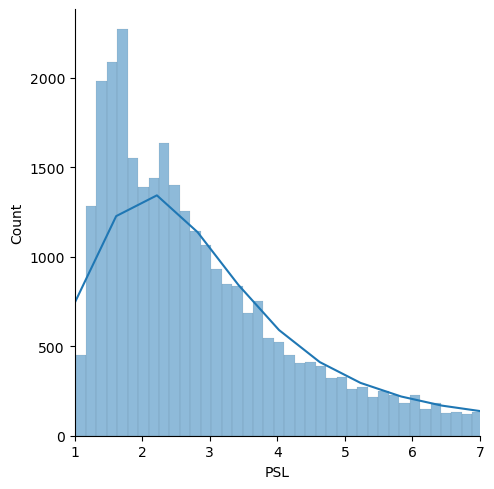

In [104]:
#PSL 
sns.displot(atp['PSL'], kde=True)
plt.xlim(1,7);


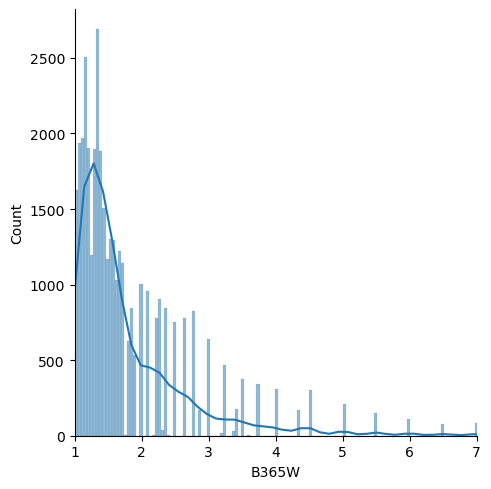

In [105]:
#B365W 
sns.displot(atp['B365W'], kde=True)
plt.xlim(1,7); 

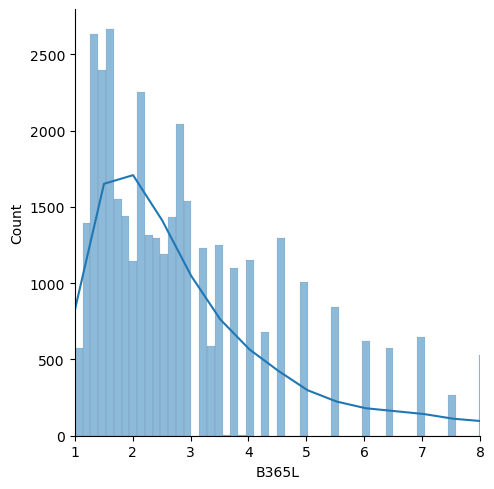

In [107]:
#B365L 
sns.displot(atp['B365L'], kde=True)
plt.xlim(1,8); 


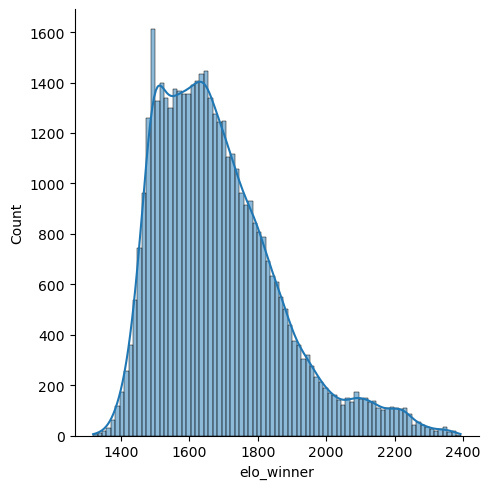

In [75]:
#elo_winner
sns.displot(atp['elo_winner'], kde=True);


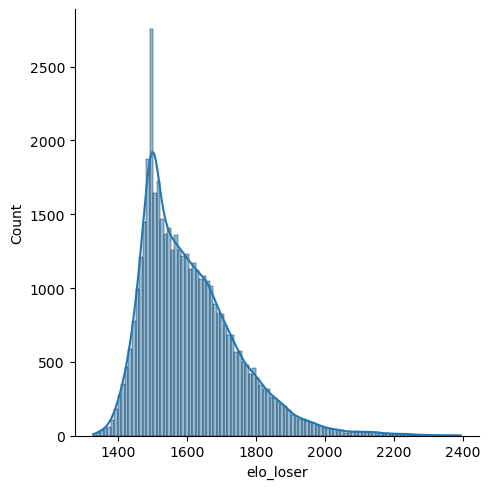

In [77]:
#elo_loser 
sns.displot(atp['elo_loser'], kde=True);


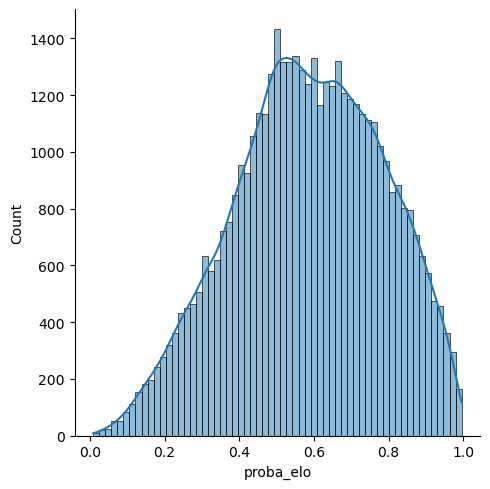

In [78]:
#proba_elo
sns.displot(atp['proba_elo'], kde=True);


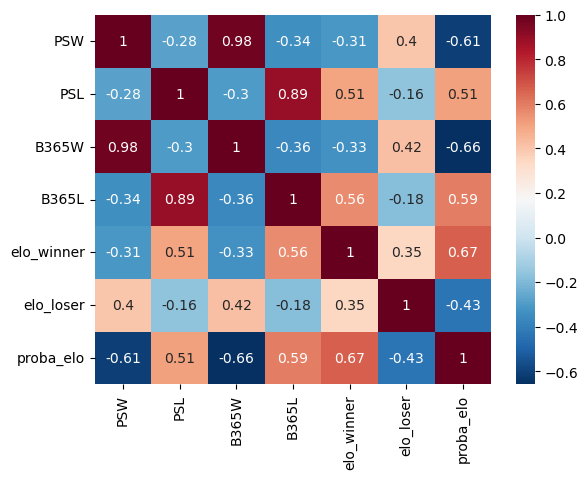

In [50]:
atp_num = atp.drop(atp_cat.columns, axis = 1) # On retire toutes les variables de type 'object'
atp_num = atp_num.dropna()
sns.heatmap(atp_num.corr(), annot=True, cmap='RdBu_r');

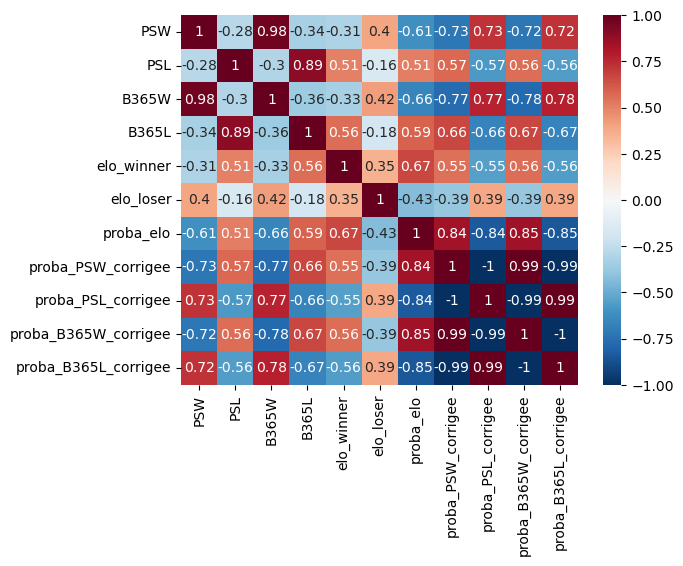

In [54]:
# quelle est notre variable cible ?
# probabilités corrigées de la marge du bookmaker
atp_num['proba_PSW_corrigee'] = (1/atp.PSW) / ((1/atp.PSW)+(1/atp.PSL)) 
atp_num['proba_PSL_corrigee'] = (1/atp.PSL) / ((1/atp.PSW)+(1/atp.PSL))
atp_num['proba_B365W_corrigee'] = (1/atp.B365W) / ((1/atp.B365W)+(1/atp.B365L))
atp_num['proba_B365L_corrigee'] = (1/atp.B365L) / ((1/atp.B365W)+(1/atp.B365L))
sns.heatmap(atp_num.corr(), annot=True, cmap='RdBu_r');


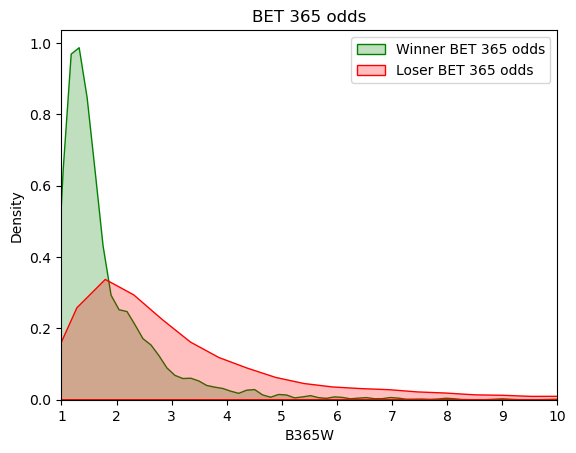

In [43]:
fig, ax = plt.subplots()
ax.set_xlim(1, 10)
sns.kdeplot(atp['B365W'], shade = True, color = 'green', label = 'Winner BET 365 odds')
sns.kdeplot(atp['B365L'], shade = True, color = 'red', label = 'Loser BET 365 odds')
plt.title('BET 365 odds')
plt.legend();

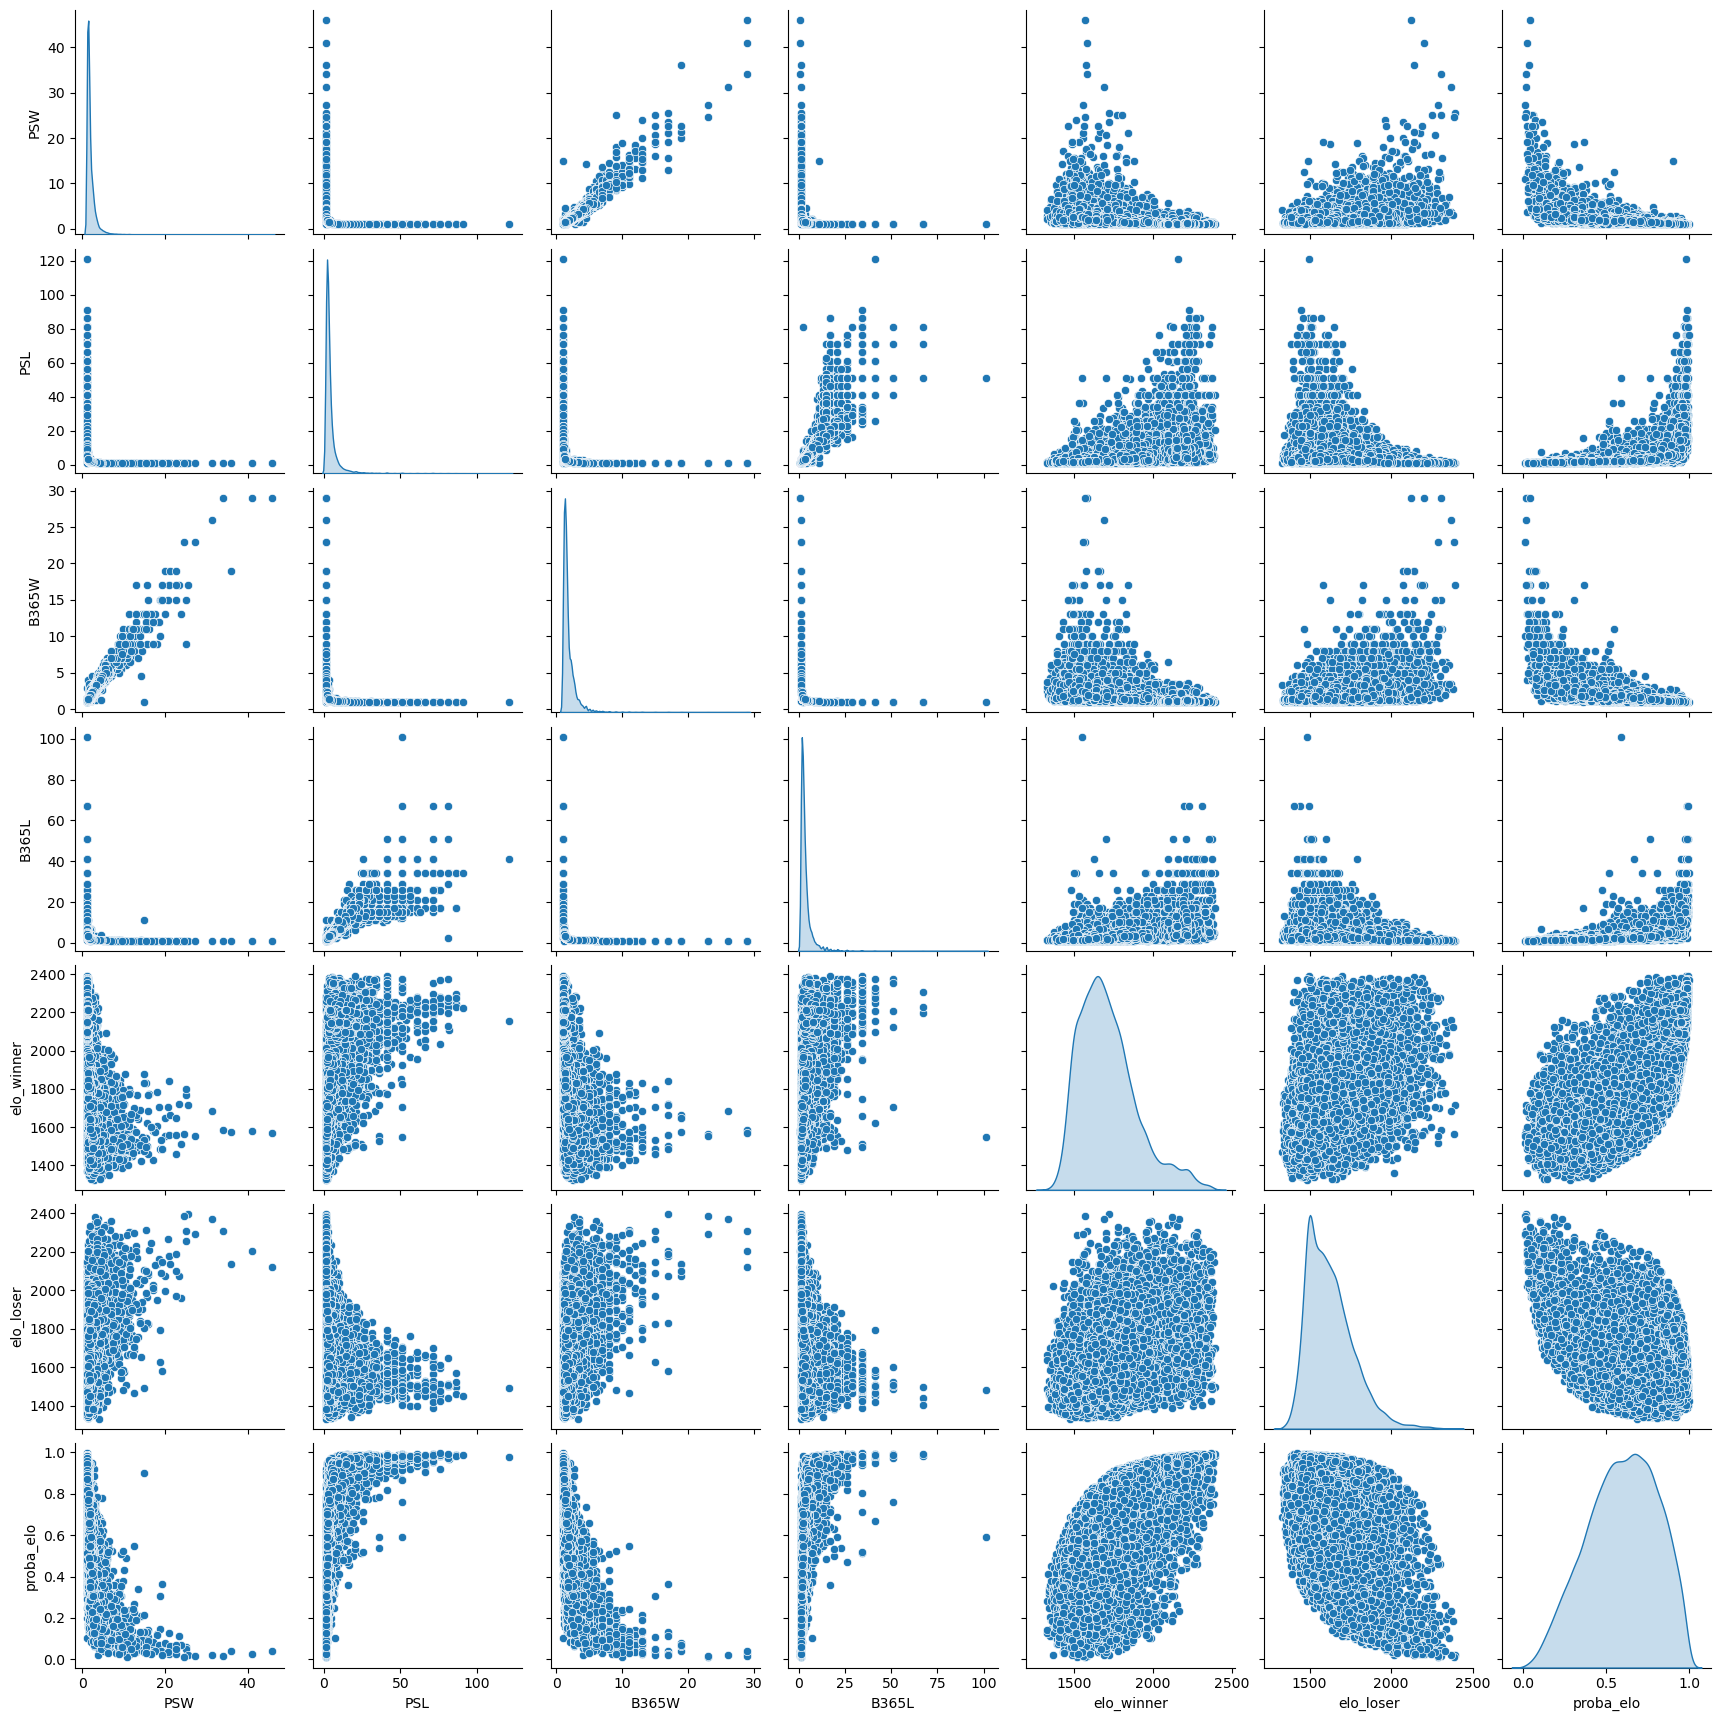

In [51]:
sns.pairplot(atp_num, diag_kind = 'kde');

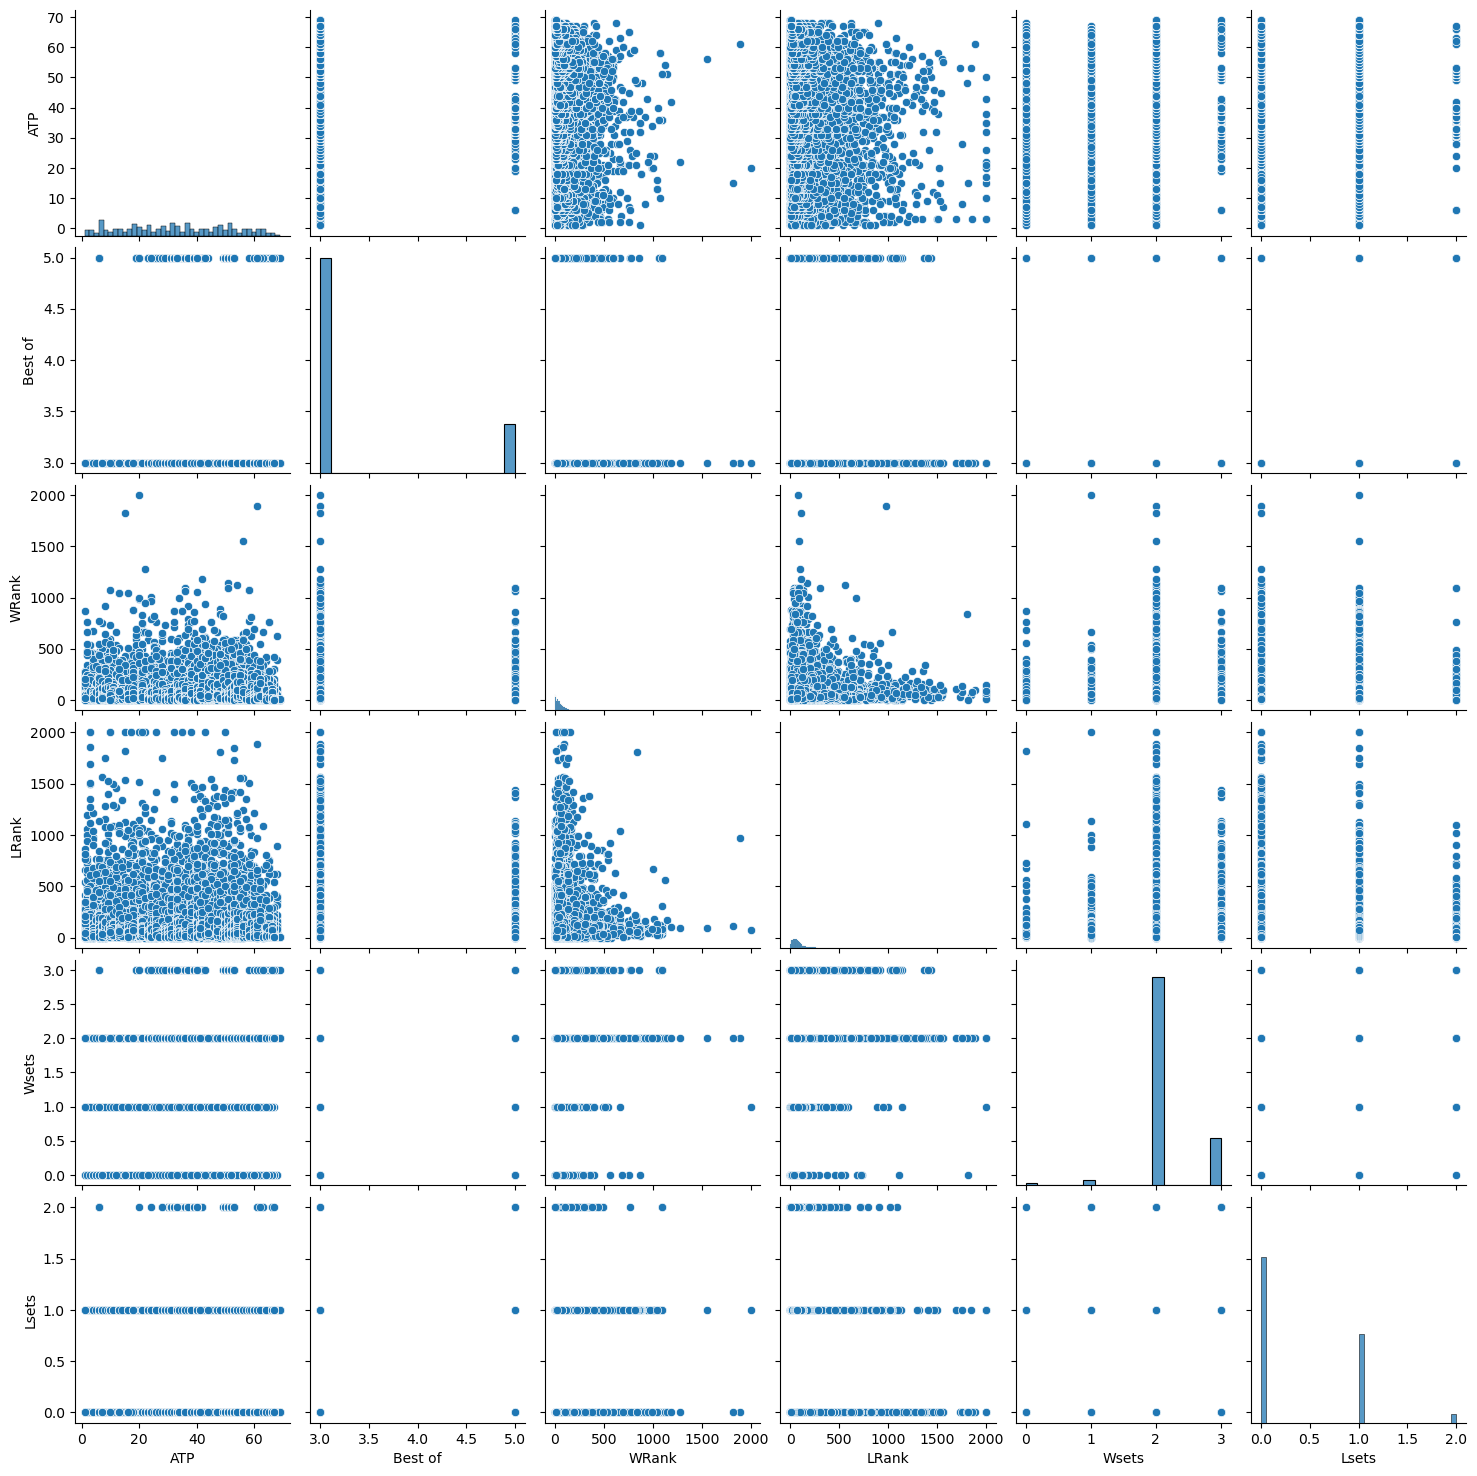

In [52]:
sns.pairplot(atp_cat, diag_kind = 'hist');